<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Nov3-4/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos los datos que vamos a trabajar.

In [ ]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files1=glob.glob('/content/drive/MyDrive/Data/CATS_DOGS/*')

In [ ]:
len(files1)

1787

In [ ]:
import random

files = random.sample(files1, len(files1))

In [ ]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento.

In [ ]:
train_x=[]
train_y=[]
for file in files[:600]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

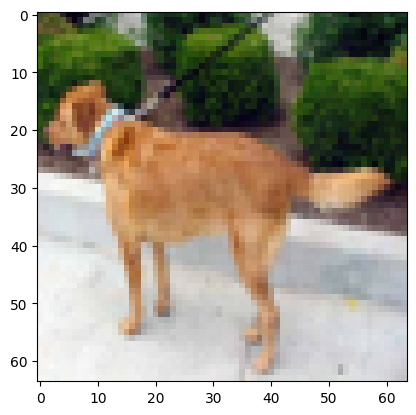

In [ ]:
plt.imshow(train_x[0])


Preparamos el dataset de prueba

In [ ]:
test_x=[]
test_y=[]
for file in files[600:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

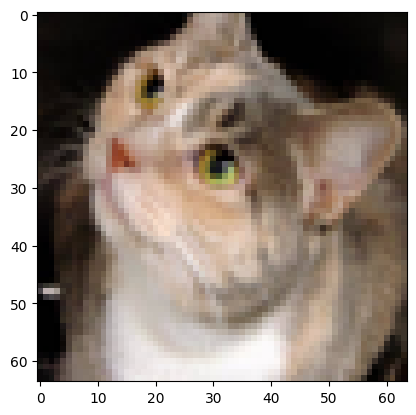

In [ ]:
plt.imshow(test_x[0])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [ ]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes

In [ ]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [ ]:
train_set_x.shape

(12288, 600)

Ya esta listo nuestro set de datos para poder trabajar con el.

In [ ]:
def sigmoid(z):
  sig = 1/(np.exp(-z)+1)

  return sig

def cost_log(y, y_hat):
  y = np.squeeze(y)
  cost = -1/len(y)*(np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

  return cost

In [ ]:
def gradient_descent(x_train, y_train, n_iter, stepsize=.1):

  y_train = np.squeeze(y_train)

  costs = []
  w = np.zeros(x_train.shape[0])
  b = np.zeros(x_train.shape[1])


  z = w@x_train + b
  y_hat = sigmoid(z)

  costs.append(cost_log(y_train, y_hat))

  for i in range(n_iter):

    #print((y_hat - np.squeeze(y_train)).shape, x_train.shape)
    dw = 1/(x_train.shape[1])*x_train@(y_hat - y_train)
    db = 1/(x_train.shape[1])*(y_hat - y_train)
    #Algoritmo Descenso
    w = w - stepsize*dw
    b = b - stepsize*db

    #print(w.shape)

    z = w@x_train + b
    y_hat = sigmoid(z)

    #print(w.shape)
    cost = cost_log(y_train, y_hat)
    costs.append(cost)

    if (i%1000 == 0):
      print('Stepsize: {} | Cost: {:}'.format(i, cost))


  return costs, w, b


def neuron(x_train, y_train, x_test=0, y_test=0):

  pass
  #Gradient Descent

In [ ]:
costos, w, b = gradient_descent(train_set_x, train_set_y, 1000, stepsize=.001)

Stepsize: 0 | Cost: 0.6880732709986507


In [ ]:
print(w.shape, test_set_x.shape)

(12288,) (12288, 1187)


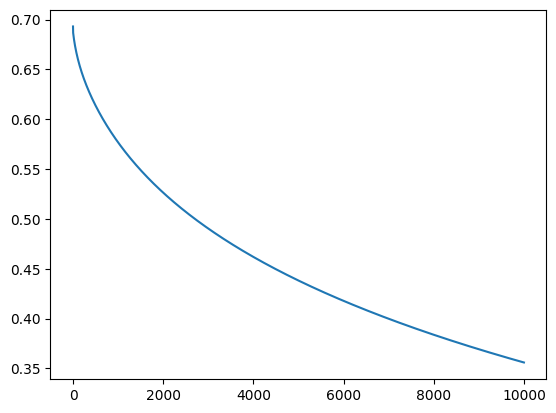

In [ ]:
plt.plot(costos)

In [ ]:
z = w@train_set_x + b

predictions = sigmoid(z)

predictions[predictions > .5] = 1
predictions[predictions < .5] = 0


predictions = predictions[(predictions == np.squeeze(train_set_y))]

print('Accuracy in the data_train: {} '.format(predictions.shape[0]/600*100))

z = w@test_set_x

predictions = sigmoid(z)

predictions[predictions > .5] = 1
predictions[predictions < .5] = 0

predictions = predictions[(predictions == np.squeeze(train_set_y))]

print('Accuracy in the test: {} '.format(predictions.shape[0]/600*100))



Accuracy in the data_train: 74.66666666666667 
Accuracy in the test: 0.0 


<ipython-input-313-27d692ba14dc>:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  predictions = predictions[(predictions == np.squeeze(train_set_y))]
